In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import itertools
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout, MaxPool2D, Dense

from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical 
from keras.utils.np_utils import to_categorical   


C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
def load_images(root_dir_name):
    x = []
    y = []
    
    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, color_mode="grayscale", target_size=(resolution, resolution))
                x.append(preprocessing.image.img_to_array(image))
                y.append(label)
    
    x = np.array(x) / 255.0
    y = np.array(y)
    
    return x, y

In [3]:
main_dir = "./input_images/brain-tumor-classification-mri/"
classification_dirs = [("no_tumor",), ("meningioma_tumor",)]
resolution = 64

In [4]:
x_train, y_train = load_images("Training")
x_test, y_test = load_images("Testing")

In [5]:
x_train.shape

(1217, 64, 64, 1)

In [6]:
x_test.shape

(220, 64, 64, 1)

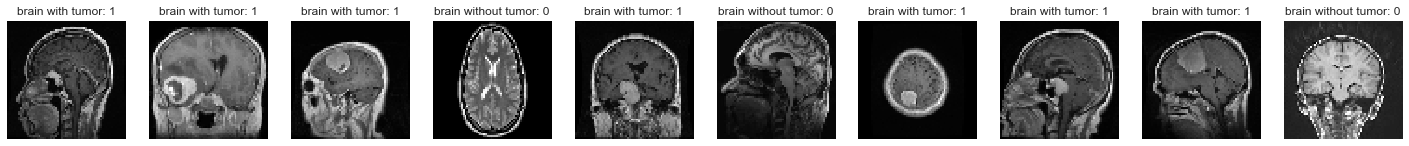

In [7]:
c = 10
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(25, 3)
for i in range(c):
    n = np.random.randint(0, len(x_train))
    num = y_train[n]
    word = "out" if num == 0 else "" 
    subplots[i].imshow(x_train[n].reshape((resolution, resolution)), cmap="gray")
    subplots[i].set_title(f"brain with{word} tumor: {num}")
    subplots[i].axis("off")
plt.show()

### Binary Classification model

In [8]:
def create_model(kernelSize = (2, 2), 
              ip_activation ="linear",
              optimizer = 'rmsprop',
              learn_rate=0.001,
              loss = 'binary_crossentropy',
              metrics = ['accuracy']):
    
    input_shape = (64,64,1)
    model = models.Sequential()
    model.add(Conv2D(32,kernel_size = kernelSize,strides = (1,1),activation = ip_activation,input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = kernelSize,strides = (2,2)))
    model.add(Conv2D(64,kernel_size = kernelSize,strides = (1,1),activation = ip_activation))
    model.add(MaxPooling2D(pool_size = kernelSize,strides = (2,2)))
    model.add(Conv2D(128,kernel_size = kernelSize,strides = (1,1),activation = ip_activation))
    model.add(MaxPooling2D(pool_size = kernelSize,strides = (2,2)))
    model.add(Conv2D(256,kernel_size = kernelSize,strides = (1,1),activation = ip_activation))
    model.add(MaxPooling2D(pool_size = kernelSize,strides = (2,2)))
    model.add(Conv2D(512,kernel_size = kernelSize,strides = (1,1),activation = ip_activation))
    model.add(MaxPooling2D(pool_size = kernelSize,strides = (2,2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="linear"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer = optimizer,loss = loss,metrics = metrics)
    
    return model

In [9]:
cnn = create_model()
cnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       32896     
__________________________________________

In [10]:
history = cnn.fit(x_train,y_train,batch_size = 100, epochs = 10, validation_data=(x_test, y_test))

Train on 1217 samples, validate on 220 samples
Epoch 1/10
1217/1217 [==============================] - 3s 2ms/sample - loss: 1.0039 - acc: 0.5998 - val_loss: 0.7021 - val_acc: 0.5227
Epoch 2/10
1217/1217 [==============================] - 3s 2ms/sample - loss: 0.6283 - acc: 0.6754 - val_loss: 0.7969 - val_acc: 0.5227
Epoch 3/10
1217/1217 [==============================] - 2s 2ms/sample - loss: 0.6225 - acc: 0.7001 - val_loss: 0.7993 - val_acc: 0.3591
Epoch 4/10
1217/1217 [==============================] - 2s 2ms/sample - loss: 0.5465 - acc: 0.7403 - val_loss: 0.8028 - val_acc: 0.5227
Epoch 5/10
1217/1217 [==============================] - 3s 2ms/sample - loss: 0.4949 - acc: 0.7576 - val_loss: 1.7863 - val_acc: 0.4591
Epoch 6/10
1217/1217 [==============================] - 3s 2ms/sample - loss: 0.4867 - acc: 0.7757 - val_loss: 0.6636 - val_acc: 0.6273
Epoch 7/10
1217/1217 [==============================] - 3s 2ms/sample - loss: 0.3519 - acc: 0.8488 - val_loss: 1.2456 - val_acc: 0.5227
E

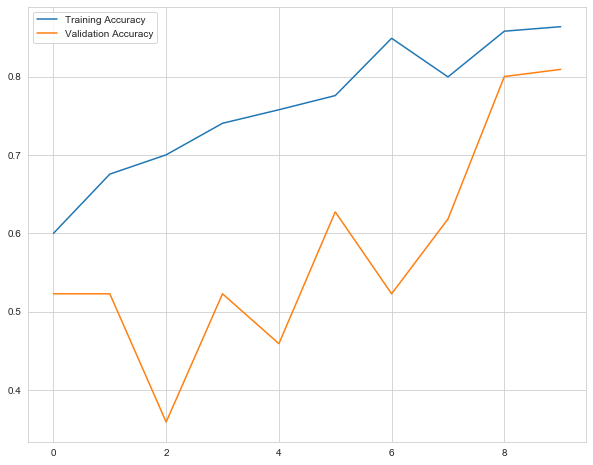

In [11]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])

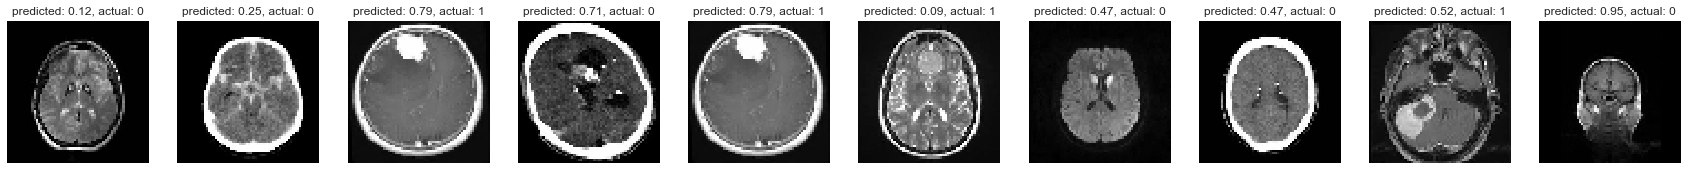

In [12]:
y_test_results = cnn.predict([x_test])

c = 10
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(30, 9)
for i in range(c):
    n = np.random.randint(0, len(x_test))
    guess = str(round(y_test_results[n][0], 2)).ljust(4, "0")
    actual = y_test[n]

    subplot = subplots[i]
    subplot.imshow(x_test[n].reshape((resolution, resolution)), cmap="gray")
    subplot.set_title(f"predicted: {guess}, actual: {actual}")
    subplot.axis("off")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model, verbose=1)

# Using hyperparameters batch size and epochs
batches = [50, 5]
epochs = [10, 20]


# grid search for batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)

Epoch 1/10
811/811 [==============================] - 2s 2ms/sample - loss: 0.0432 - acc: 0.9667
Epoch 2/10
811/811 [==============================] - 2s 2ms/sample - loss: 4.4440e-06 - acc: 1.0000
Epoch 3/10
811/811 [==============================] - 2s 2ms/sample - loss: 2.0389e-06 - acc: 1.0000
Epoch 4/10
811/811 [==============================] - 2s 2ms/sample - loss: 8.1272e-07 - acc: 1.0000
Epoch 5/10
811/811 [==============================] - 2s 2ms/sample - loss: 3.5914e-07 - acc: 1.0000
Epoch 6/10
811/811 [==============================] - 2s 2ms/sample - loss: 1.1227e-07 - acc: 1.0000
Epoch 7/10
811/811 [==============================] - 2s 2ms/sample - loss: 6.3826e-08 - acc: 1.0000
Epoch 8/10
811/811 [==============================] - 2s 2ms/sample - loss: 2.9835e-08 - acc: 1.0000
Epoch 9/10
811/811 [==============================] - 2s 2ms/sample - loss: 1.3455e-08 - acc: 1.0000
Epoch 10/10
406/406 [==============================] - 0s 758us/sample - loss: 2.7446e-08 - acc

812/812 [==============================] - 2s 3ms/sample - loss: 0.2795 - acc: 0.8892
Epoch 10/20
812/812 [==============================] - 2s 3ms/sample - loss: 0.2392 - acc: 0.9261
Epoch 11/20
812/812 [==============================] - 2s 3ms/sample - loss: 0.2242 - acc: 0.9212
Epoch 12/20
812/812 [==============================] - 2s 3ms/sample - loss: 0.1212 - acc: 0.9544
Epoch 13/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.3117 - acc: 0.9138
Epoch 14/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.0475 - acc: 0.9926
Epoch 15/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.0409 - acc: 0.9901
Epoch 16/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.2212 - acc: 0.9433
Epoch 17/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.0167 - acc: 0.9988
Epoch 18/20
812/812 [==============================] - 2s 2ms/sample - loss: 0.2114 - acc: 0.9249
Epoch 19/20
812/812 [===========

811/811 [==============================] - 3s 4ms/sample - loss: 0.0217 - acc: 0.9963
Epoch 18/20
811/811 [==============================] - 3s 4ms/sample - loss: 0.0636 - acc: 0.9926
Epoch 19/20
811/811 [==============================] - 3s 4ms/sample - loss: 0.0118 - acc: 0.9963
Epoch 20/20
406/406 [==============================] - 1s 1ms/sample - loss: 8.4330 - acc: 0.6527
Epoch 1/20
812/812 [==============================] - 3s 4ms/sample - loss: 0.7044 - acc: 0.5973
Epoch 2/20
812/812 [==============================] - 4s 4ms/sample - loss: 0.4650 - acc: 0.7968
Epoch 3/20
812/812 [==============================] - 3s 4ms/sample - loss: 0.3136 - acc: 0.8941
Epoch 4/20
812/812 [==============================] - 3s 4ms/sample - loss: 0.2047 - acc: 0.9372
Epoch 5/20
812/812 [==============================] - 3s 4ms/sample - loss: 0.1188 - acc: 0.9520
Epoch 6/20
812/812 [==============================] - 3s 4ms/sample - loss: 0.1067 - acc: 0.9655
Epoch 7/20
812/812 [==================

In [14]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.7962 using {'batch_size': 5, 'epochs': 20}
mean=0.7339, std=0.327 using {'batch_size': 50, 'epochs': 10}
mean=0.6556, std=0.256 using {'batch_size': 50, 'epochs': 20}
mean=0.7626, std=0.2596 using {'batch_size': 5, 'epochs': 10}
mean=0.7962, std=0.1481 using {'batch_size': 5, 'epochs': 20}


### Multiclass Classification

In [15]:
training_data_dir = (r'./input_images/brain-tumor-classification-mri/Training/')
testing_data_dir = (r'./input_images/brain-tumor-classification-mri/Testing/')

categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

img_size = 128

# for i in categories:
#     path = os.path.join(data_dir, i)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))   

In [16]:

# image_array = cv2.resize(img_array, (img_size,img_size))

In [17]:
def display_image(img):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.imshow(img)
    plt.axis('off')    

### Glioma Tumor

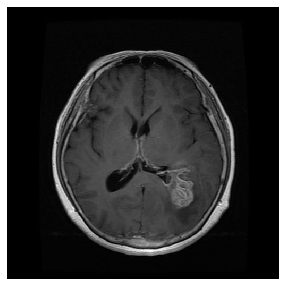

In [18]:
display_image(cv2.imread('./input_images/brain-tumor-classification-mri/Training/glioma_tumor/gg (10).jpg'))

### Maningioma tumor

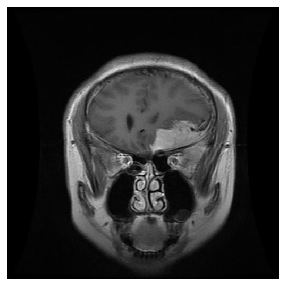

In [19]:
display_image(cv2.imread('./input_images/brain-tumor-classification-mri/Training/meningioma_tumor/m (10).jpg'))

### No Tumor

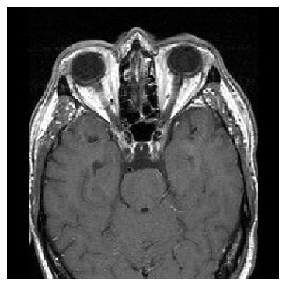

In [20]:
display_image(cv2.imread('./input_images/brain-tumor-classification-mri/Training/no_tumor/1.jpg'))

### Pituitary Tumor

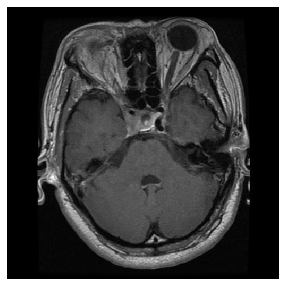

In [21]:
display_image(cv2.imread('./input_images/brain-tumor-classification-mri/Training/pituitary_tumor/p (5).jpg'))

In [22]:
def get_data(data_dir, categories):
    data = []
    for category in categories:
        train_path = os.path.join(data_dir,category)
        tag = categories.index(category)
        for img in os.listdir(train_path):
            try:
                image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
                new_image_array = cv2.resize(image_arr, (img_size,img_size))
                data.append([new_image_array , tag])
            except Exception as e:
                pass
    
    return data

In [23]:
def transform_data(data):
    X = []
    y = []
    for feature, label in data:
        X.append(feature)
        y.append(label)
    X = np.array(X).reshape(-1,img_size,img_size)
    X = X/255.0  
    X = X.reshape(-1,img_size,img_size,1)
    
    return X, y

In [24]:
training_data = get_data(training_data_dir, categories)
X_train, y = transform_data(training_data)

y_train = to_categorical(y, num_classes = 4)


In [25]:
X_train.shape

(2870, 128, 128, 1)

In [26]:
y_train.shape

(2870, 4)

In [29]:
testing_data = get_data(testing_data_dir, categories)
X_test, y_test = transform_data(testing_data)

In [30]:
X_test.shape

(394, 128, 128, 1)

In [31]:
y_test_enc = to_categorical(y_test, num_classes = 4)

In [32]:
y_test_enc.shape

(394, 4)

In [33]:
def multi_class_model():
    model = models.Sequential()

    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(1024, activation = "relu"))
    model.add(Dropout(0.5))

    model.add(Dense(4, activation = "softmax"))

    return model




In [34]:
imgageGenerator = ImageDataGenerator(featurewise_center=False,  
                                     samplewise_center=False, 
                                     featurewise_std_normalization=False,  
                                     samplewise_std_normalization=False,  
                                     zca_whitening=False,  
                                     rotation_range=0,
                                     zoom_range = 0,
                                     width_shift_range=0,  
                                     height_shift_range=0,  
                                     horizontal_flip=True,  
                                     vertical_flip=False)
imgageGenerator.fit(X_train)

In [35]:
optimizer = Adam(lr=0.001)

epochs = 20
batch_size = 16
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience = 3
)



In [36]:
cnn_mlt_class = multi_class_model()
cnn_mlt_class.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [37]:
cnn_mlt_class.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 128, 128, 64)      1664      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 256)     

In [38]:
history = cnn_mlt_class.fit_generator(imgageGenerator.flow(X_train,y_train,batch_size = batch_size),
                              epochs = epochs, validation_data = (X_test,y_test_enc),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              callbacks = [es])    

Epoch 1/20
179/179 [==============================] - 141s 787ms/step - loss: 1.0873 - acc: 0.5463 - val_loss: 1.7580 - val_acc: 0.3604
Epoch 2/20
179/179 [==============================] - 138s 768ms/step - loss: 0.7068 - acc: 0.6945 - val_loss: 1.6988 - val_acc: 0.4239
Epoch 3/20
179/179 [==============================] - 136s 762ms/step - loss: 0.5733 - acc: 0.7652 - val_loss: 2.2485 - val_acc: 0.4797
Epoch 4/20
179/179 [==============================] - 138s 772ms/step - loss: 0.4598 - acc: 0.8143 - val_loss: 2.4931 - val_acc: 0.5025
Epoch 5/20
179/179 [==============================] - 137s 767ms/step - loss: 0.4075 - acc: 0.8385 - val_loss: 2.3278 - val_acc: 0.4746
Epoch 6/20
179/179 [==============================] - 141s 787ms/step - loss: 0.3139 - acc: 0.8826 - val_loss: 2.9890 - val_acc: 0.6371
Epoch 7/20
179/179 [==============================] - 145s 812ms/step - loss: 0.2928 - acc: 0.8879 - val_loss: 2.2192 - val_acc: 0.6624
Epoch 8/20
179/179 [============================

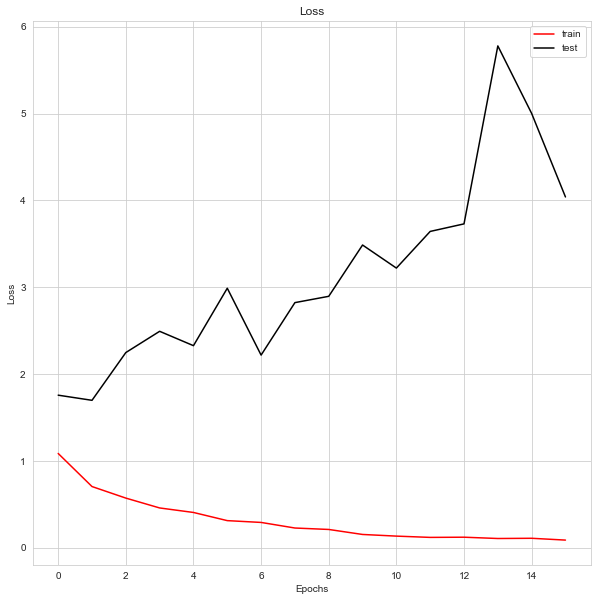

In [39]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(history.history["loss"],c = "red")
plt.plot(history.history["val_loss"],c = "black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

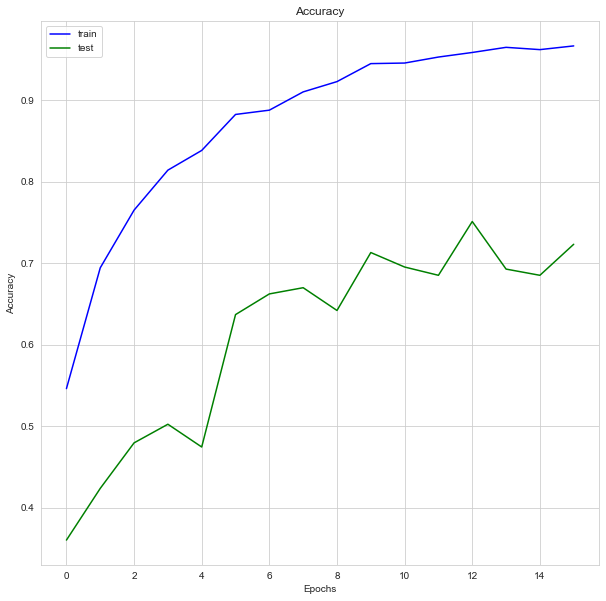

In [40]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(history.history["acc"],c = "blue")
plt.plot(history.history["val_acc"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])